In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
            path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

def plot_shape(csv_path):
    csv_curve = read_csv(csv_path)
    plot(csv_curve)
    print("Number of curves:", len(csv_curve))

In [3]:
csv_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\line2.csv"
line = read_csv(csv_path)[0][0]
print(line)

[[546. 108.]
 [545. 109.]
 [546. 109.]
 ...
 [161. 354.]
 [162. 354.]
 [163. 354.]]


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def is_straight_line(points, threshold=0.99):
    x = np.array([p[0] for p in points]).reshape(-1, 1)
    y = np.array([p[1] for p in points])
    
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    
    r2 = r2_score(y, y_pred)
    return r2 >= threshold

In [5]:
print(is_straight_line(line))  # Output: True

True


In [6]:
ellipse_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\ellipse1.csv"
ellipse = read_csv(ellipse_path)[0][0]
print(is_straight_line(ellipse))

False


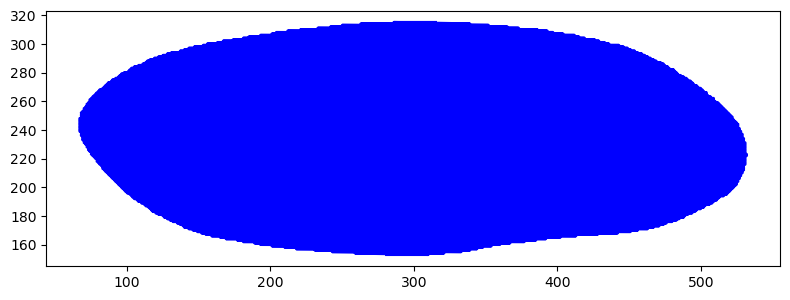

Number of curves: 1


In [13]:
plot_shape(ellipse_path)

In [8]:
curved_line_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\curved_line.csv"
curved_line = read_csv(curved_line_path)[0][0]
print(is_straight_line(curved_line))

False


In [9]:
def polygon_area(points):
    n = len(points)
    area = 0.0
    for i in range(n - 1):
        area += points[i][0] * points[i + 1][1] - points[i + 1][0] * points[i][1]
    area += points[-1][0] * points[0][1] - points[0][0] * points[-1][1]
    return abs(area) / 2.0

def is_closed_shape(points):
    if len(points) < 3:
        return False

    area = polygon_area(points)
    return area > 0 and points[0] == points[-1]

In [10]:
print(is_closed_shape(curved_line))

[False False]


In [11]:
print(is_closed_shape(ellipse))

[False False]


In [3]:
isolation_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\isolated.csv"
polylines = read_csv(isolation_path)

In [4]:
print(is_closed_shape(polylines[2][0]))

NameError: name 'is_closed_shape' is not defined

In [18]:
from shapely.geometry import Polygon

def is_closed_shape(points):
    if len(points) < 3:
        return False

    polygon = Polygon(points)
    return polygon.is_valid and polygon.is_closed

In [19]:
print(is_closed_shape(curved_line))
print(is_closed_shape(ellipse))

False
False


In [24]:
print(is_closed_shape(polylines[2][0]))

False


In [22]:
print(polylines[0][0])

[[109.14299774 125.58000183]
 [110.15747833 125.49578094]
 [111.17194366 125.40398407]
 [112.18638611 125.30522156]
 [113.20079041 125.20011139]
 [114.21517181 125.08926392]
 [115.22950745 124.97328949]
 [116.2437973  124.85279083]
 [117.25804138 124.72838593]
 [118.27222443 124.60068512]
 [119.28635406 124.47029877]
 [120.30041504 124.33782959]
 [121.31440735 124.2039032 ]
 [122.32831573 124.06912231]
 [123.34214783 123.93410492]
 [124.355896   123.79945374]
 [125.36954498 123.66577911]
 [126.38310242 123.53369141]
 [127.39655304 123.40380859]
 [128.40989685 123.27674103]
 [129.42312622 123.15309143]
 [130.43623352 123.03347778]
 [131.44923401 122.91851044]
 [132.46208191 122.80879974]
 [133.47480774 122.70494843]
 [134.48739624 122.60758209]
 [135.49983215 122.51730347]
 [136.51213074 122.43471527]
 [137.52426147 122.36045074]
 [138.53623962 122.29509735]
 [139.54803467 122.2392807 ]
 [140.55967712 122.19360352]
 [141.57113647 122.15868378]
 [142.58241272 122.13512421]
 [143.5934906 

In [33]:
import math

def is_closed_shape(points, tolerance=1):
    if len(points) < 3:
        return False  # Not enough points to form a closed shape

    def distance(p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    return distance(points[0], points[-1]) < tolerance

In [34]:
print(is_closed_shape(curved_line))
print(is_closed_shape(ellipse))

False
False


In [35]:
print(is_closed_shape(polylines[2][0]))

True


In [38]:
frag_path = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\frag0.csv"
frag = read_csv(frag_path)

In [43]:
print(is_closed_shape(frag[4][0]))

False


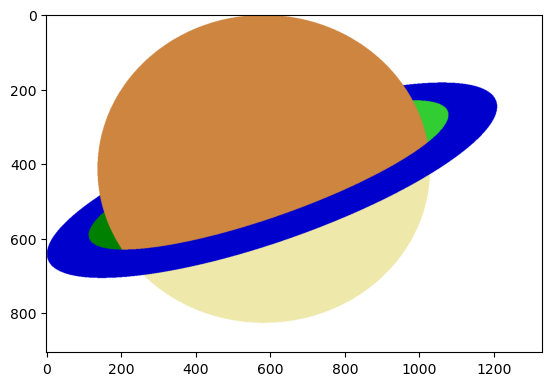

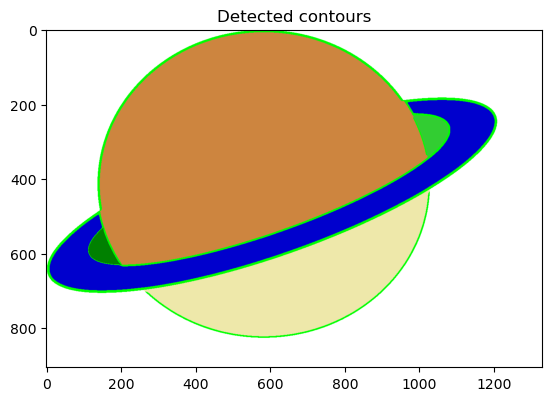

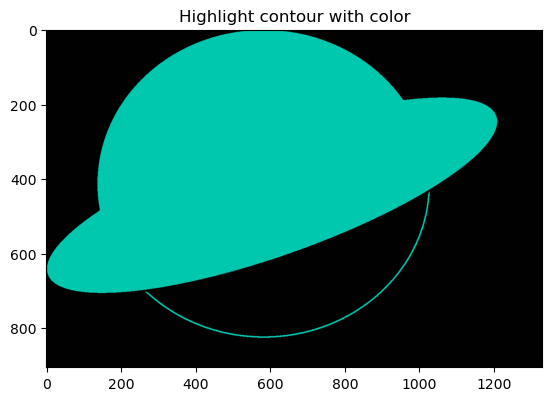

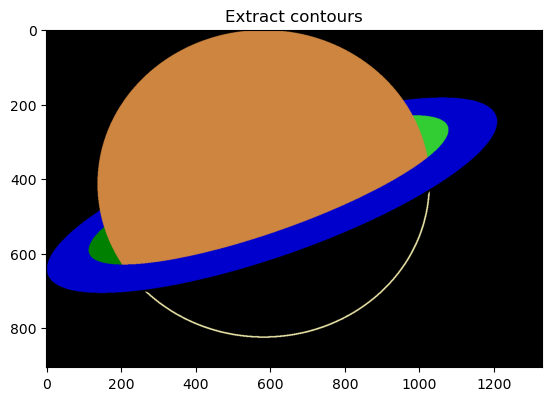

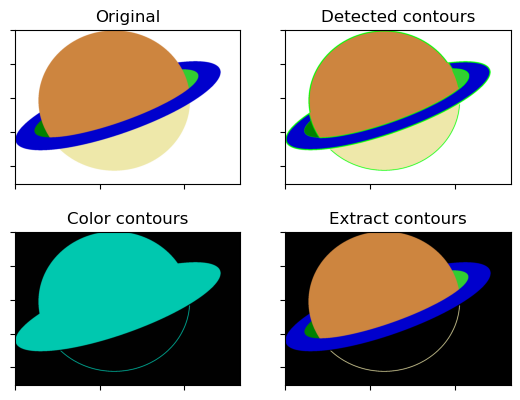

In [44]:
#imports
import cv2
from matplotlib import pyplot as plt
import numpy as np

#loading img
file = r"C:\Users\suyash\OneDrive - iiit-b\Projects\Adobe_GenSolve\problems\problems\occlusion2_rec.png"
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5)

#Func to find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
detected_contours = img.copy()
cv2.drawContours(detected_contours, contours, -1, (0, 255, 0), -1)
plt.imshow(detected_contours)
plt.title('Detected contours')
plt.show()

contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#masking img
highlight = np.ones_like(img)
cv2.drawContours(highlight, contours, -1, (0, 200, 175), cv2.FILLED)
plt.imshow(highlight)
plt.title('Highlight contour with color')
plt.show()

#masking again
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)
foreground = cv2.bitwise_and(img, mask)

#edges
plt.imshow(foreground)
plt.title('Extract contours')
plt.show()

print("\t")

#--main-plot--
contours = {"Original": img, "Detected contours": detected_contours,
            "Color contours": highlight, "Extract contours": foreground}
plt.subplots_adjust(wspace=.2, hspace=.2)
plt.tight_layout()

for i, (key, value) in enumerate(contours.items()):
    plt.subplot(2, 2, i + 1)
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
    plt.title("{}".format(key))
    plt.imshow(value)

plt.show()

In [5]:
def is_convex(points):
    def cross_product_sign(o, a, b):
        # Vector OA
        vector_oa = (a[0] - o[0], a[1] - o[1])
        # Vector OB
        vector_ob = (b[0] - o[0], b[1] - o[1])
        # Cross product of OA and OB
        cross_product = vector_oa[0] * vector_ob[1] - vector_oa[1] * vector_ob[0]
        return cross_product

    n = len(points)
    if n < 3:
        return False  # A curve with less than 3 points is not well-defined

    signs = []

    for i in range(n):
        o = points[i]
        a = points[(i + 1) % n]
        b = points[(i + 2) % n]
        cross_product = cross_product_sign(o, a, b)
        if cross_product != 0:
            signs.append(cross_product > 0)

    # Check if all signs are the same
    return all(signs) or not any(signs)

In [6]:
print(is_convex(polylines[1][0]))

False


In [7]:
print(is_convex(polylines[0][0]))
print(is_convex(polylines[2][0]))

False
False


In [8]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

def plot_shape_and_convex_hull(points):
    points = np.array(points)
    
    # Compute the convex hull
    hull = ConvexHull(points)
    
    # Compute the area of the original shape
    original_area = 0.5 * np.abs(np.dot(points[:, 0], np.roll(points[:, 1], 1)) - np.dot(points[:, 1], np.roll(points[:, 0], 1)))
    
    # Compute the area of the convex hull
    hull_points = points[hull.vertices]
    hull_area = 0.5 * np.abs(np.dot(hull_points[:, 0], np.roll(hull_points[:, 1], 1)) - np.dot(hull_points[:, 1], np.roll(hull_points[:, 0], 1)))
    
    # Difference in area
    area_difference = hull_area - original_area
    
    # Plot the original shape
    plt.figure(figsize=(8, 6))
    plt.plot(points[:, 0], points[:, 1], 'o-', label='Original Shape')
    
    # Plot the convex hull
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
    plt.plot(hull_points[:, 0], hull_points[:, 1], 'r--', lw=2, label='Convex Hull')
    
    plt.fill(hull_points[:, 0], hull_points[:, 1], 'r', alpha=0.1)
    plt.fill(points[:, 0], points[:, 1], 'b', alpha=0.1)
    
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Shape and Convex Hull')
    plt.show()
    
    return area_difference

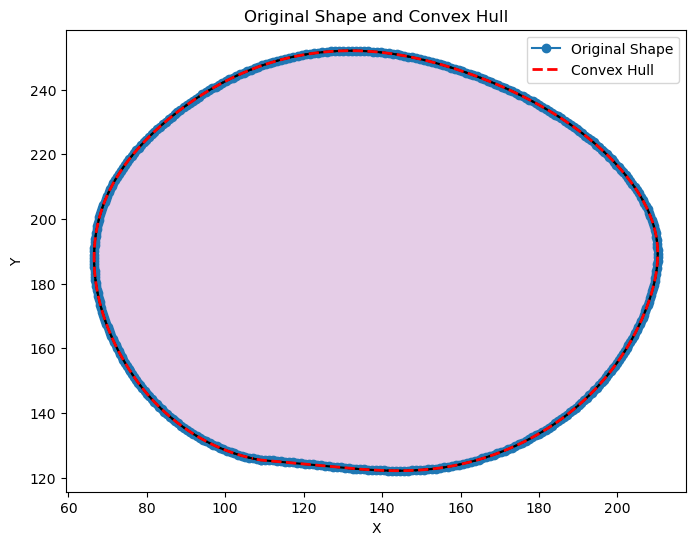

3.135824365541339


In [10]:
diff1 = plot_shape_and_convex_hull(polylines[0][0])
print(diff1)

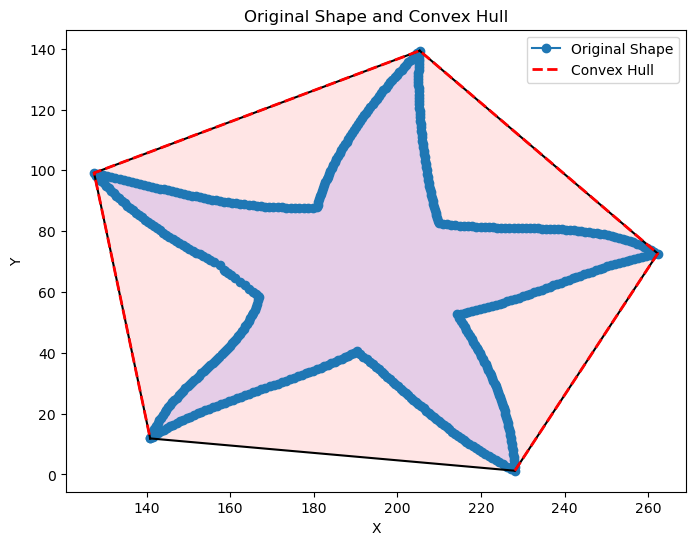

7091.964622546984


In [11]:
diff2 = plot_shape_and_convex_hull(polylines[1][0])
print(diff2)

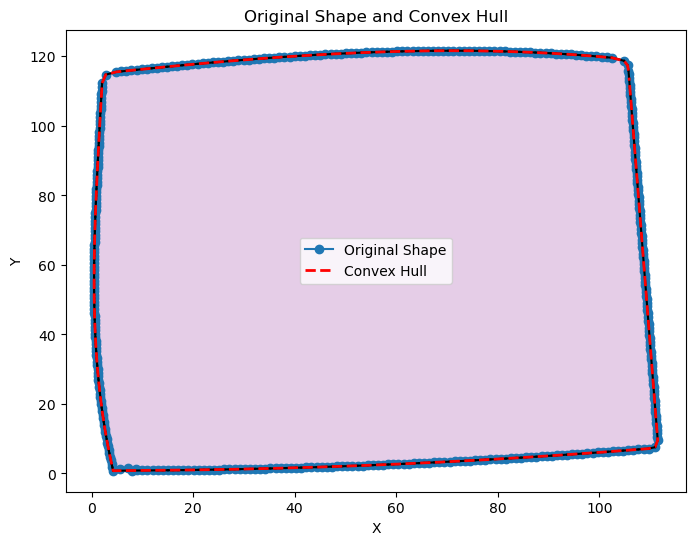

2.1768378079286776


In [12]:
diff3 = plot_shape_and_convex_hull(polylines[2][0])
print(diff3)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def calculate_circularity(points):
    points = np.array(points)
    
    # Compute area using the Shoelace formula
    def polygon_area(pts):
        return 0.5 * np.abs(np.dot(pts[:, 0], np.roll(pts[:, 1], 1)) - np.dot(pts[:, 1], np.roll(pts[:, 0], 1)))
    
    # Compute perimeter
    def polygon_perimeter(pts):
        return np.sum(np.sqrt(np.sum(np.diff(np.vstack([pts, pts[0]]), axis=0)**2, axis=1)))
    
    area = polygon_area(points)
    perimeter = polygon_perimeter(points)
    
    # Compute circularity
    circularity = 4 * np.pi * area / (perimeter ** 2)
    
    return circularity


def differentiate_shape(points):
    circularity = calculate_circularity(points)
    
    # Determine shape based on circularity
    if circularity > 0.95:
        shape = "Circle or Ellipse"
    else:
        shape = "Other Regular Polygon"
    
    return shape, circularity

In [18]:
shape, circularity = differentiate_shape(polylines[0][0])
print(f'Shape: {shape}, Circularity: {circularity}')

Shape: Circle or Ellipse, Circularity: 0.9916954495851904


In [19]:
shape, circularity = differentiate_shape(polylines[1][0])
print(f'Shape: {shape}, Circularity: {circularity}')

Shape: Other Regular Polygon, Circularity: 0.2328277289109376


In [20]:
shape, circularity = differentiate_shape(polylines[2][0])
print(f'Shape: {shape}, Circularity: {circularity}')

Shape: Other Regular Polygon, Circularity: 0.8221583188417492
